<a href="https://colab.research.google.com/github/sakib927/LGMVIP--JUNE22-DATA-SCIENCE-/blob/main/Iris_Flowers_Classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's Grow More (LGMVIP) 

LGMVIP -JUNE22

BEGINNER LEVEL TASK

TASK-1- Iris Flowers Classification ML Project :

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Dataset link : http://archive.ics.uci.edu/ml/machine-learning-databases/iris

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/iris.csv', names = ['sepal-lenght','sepal-width','petal-lenght','petal-width','class'])

In [ ]:
data

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.size

750

In [ ]:
data.info

<bound method DataFrame.info of      sepal-lenght  sepal-width  petal-lenght  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [ ]:
data.describe()

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

sepal-lenght    0
sepal-width     0
petal-lenght    0
petal-width     0
class           0
dtype: int64

Data Visualisation

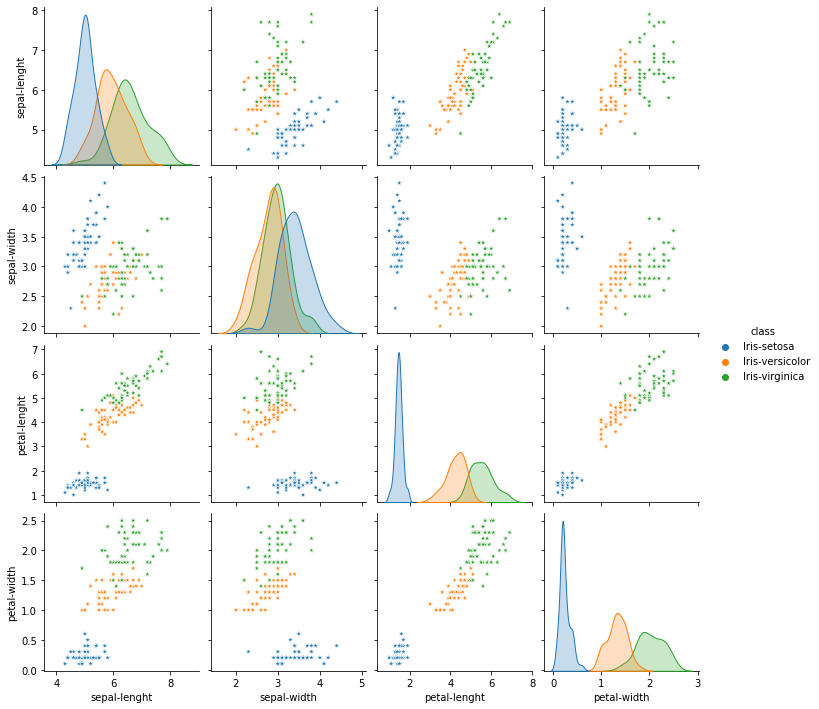

In [ ]:
sns.pairplot(data, hue='class', markers='*')
plt.show()

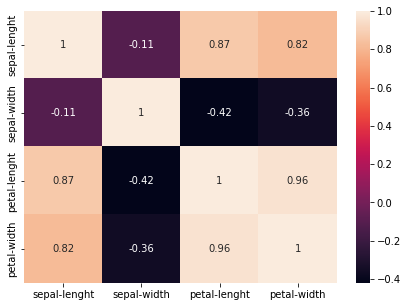

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

Building Model

In [ ]:
labelencoder = LabelEncoder()
X = data.iloc[:,4].values
data.iloc[:,4] = labelencoder.fit_transform(X)
X = X.reshape(-1,1) 

In [ ]:
data

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x1 = data.drop(['class'], axis='columns', inplace=False)
y1 = data['class']

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train , y_train)

prediction =knn.predict(X_test) 

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9555555555555556


In [ ]:
target_names = ['Iris-virginica','Iris-setosa','Iris-versicolor']

In [ ]:
matrix = confusion_matrix(y_test,prediction, labels=[1,0])
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(y_test,prediction,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(y_test,prediction,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[12  0]
 [ 0 17]]
Outcome values : 
 12 0 0 17
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           0       1.00      1.00      1.00        17

   micro avg       1.00      0.94      0.97        31
   macro avg       1.00      0.93      0.96        31
weighted avg       1.00      0.94      0.97        31



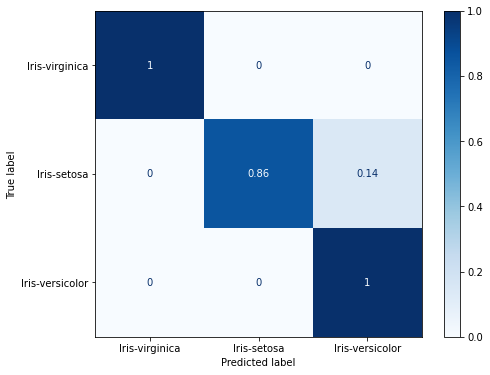

In [ ]:
cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

Conclusion:- We have obtained the accuracy of 95.556 by the help of K-Nearest Neighbour classification model
